# Environments

Copyright 2023 Moran Innovation LLC

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.

CryoFM™ is a trademark of Moran Innovation LLC. All rights reserved.

### Overview

The environments that a spacecraft is exposed to are a function of the mission segment and ConOps. CFM is strongly impacted by the corresponding induced acceleration and thermal sources and sinks. An understanding and characterization of these environments is essential for identifying key CFM drivers, and for making appropriate system design and operational trades. NASA SLS-SPEC-159 provides comprehensive definition of natural environments relevant for all space exploration systems development.

### Crewed Lunar Mission g-Level Approximations

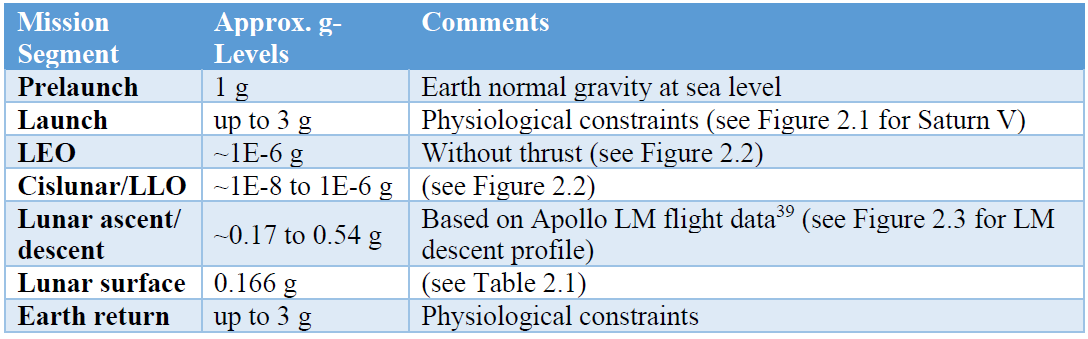

### Space Equilibrium Temperature in Cislunar Space

Consider a spacecraft on a translunar trajectory roughly midway between the earth and moon. What is the spacecraft’s equilibrium surface temperature if the ratio of its absorbing projected to emitting surface area (Ap/As) is 0.224, and its ratio of surface absorptivity to emissivity is 1.23?

In [23]:
S_B = 5.67037441918e-8  # W/m^2-K^4; Stefan-Boltzmann constant

# Inputs
area_projected = 0.224  # m^2; projected absorbing area
area_emitting = 1  # m^2; emitting surface area
absorptivity = 0.90  # gray diffuse surface absorptivity
emissivity = 0.73  # gray diffuse surface emissivity
q_solar = 1421  # W/m^2; solar heat flux
temp_sink = 3  # K; environment sink temperature

# Equilibrium surface temperature in space; K
temp_equil = temp_sink + (area_projected / area_emitting * absorptivity / 
                          emissivity * q_solar / S_B)**0.25
print("Equilibrium surface temperature =", "{:.0f}".format(temp_equil), "K")

Equilibrium surface temperature = 291 K


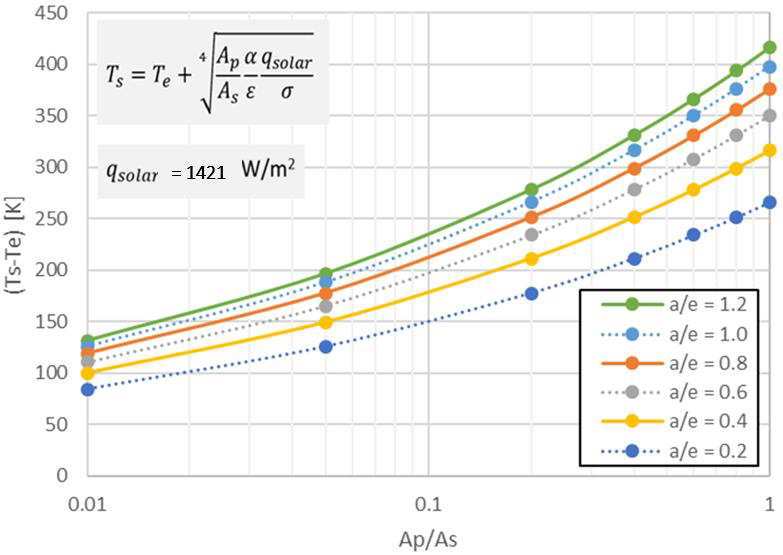

### Lunar Daytime Surface Temperature

For a lunar lander on the surface of the moon at 0 degrees latitude (equator) in a highland region, calculate the approximate daytime surface temperature for running sensitivity analyses. How does this value change if the lander is near the south pole at 85 degrees south latitude?

In [25]:
import math

S_B = 5.67037441918e-8  # W/m^2-K^4; Stefan-Boltzmann constant

# Inputs
solar_constant = 1421  # W/m^2; solar heat flux at lunar surface
albedo_lunar = 0.16  # visible light (solar spectrum) albedo
emissivity_ir = 0.975  # thermal infrared emissivity of the regolith
latitude = (0., 85.)

# Lunar surface temperature
for z in latitude:
    z_angle = z / 180 * math.pi  # radians; the solar zenith angle
    temp_lunar_surf = (solar_constant * (1 - albedo_lunar) * math.cos(z_angle) / 
                   emissivity_ir / S_B)**0.25
    print("Lunar surface temperature at", "{:.0f}".format(z), 
          "degrees latitude is", "{:.0f}".format(temp_lunar_surf), "K")

Lunar surface temperature at 0 degrees latitude is 383 K
Lunar surface temperature at 85 degrees latitude is 208 K
